In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data_raw=pd.read_csv('dataset_simple.csv',na_values='NA')

In [3]:
data_raw.shape

(9999, 1001)

In [4]:
data_raw.head(10)

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-7.375136,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1
5,0.611700,-0.244822,0.583607,1.503404,-0.104725,0.943069,1.826918,-0.694449,-0.113367,0.909642,...,0.441221,-1.386731,2.167706,0.143728,-0.031690,-0.710304,-0.406994,1.284103,0.398134,1
6,-0.683728,0.624575,-2.098098,14.415604,0.089336,0.591611,0.292786,0.853558,2.063484,-1.549264,...,1.298536,0.848869,-2.538228,1.595099,-0.365556,2.755379,-1.017768,-0.028076,0.098568,0
7,0.522493,-1.551632,1.037685,4.540567,-2.180189,-1.091859,-0.155177,1.039134,-2.164338,-1.310618,...,0.263004,1.851860,0.440721,-0.005803,1.211405,0.489479,0.868569,0.726896,1.076512,1
8,0.722775,1.323710,-0.487995,-6.635840,0.371237,-0.643517,0.402858,-0.378908,-1.435613,-1.843280,...,0.977186,1.137189,-0.331244,1.068881,1.736115,0.171098,1.582741,-2.111628,-1.630762,1
9,-0.086277,-0.138011,0.488998,-6.420821,0.529817,-0.559980,-0.089184,-0.597874,0.780693,0.626407,...,-2.018879,-1.184220,1.086613,0.149949,-0.265005,-0.370810,0.314975,0.601241,-0.272400,1


In [5]:
data_raw.describe()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,...,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,-0.004460,-0.013556,-0.003732,-0.526323,0.005371,-0.008539,0.017156,-0.001695,0.016588,-0.011591,...,0.004245,0.004588,0.000104,-0.004114,-0.015524,0.003792,-0.012826,-0.000154,0.008867,0.493149
std,0.991939,1.004086,1.004643,5.892651,0.995250,1.001142,0.995826,1.000576,1.016175,0.994338,...,1.010292,0.996613,0.984661,1.005568,1.000405,0.992878,0.986676,1.003824,0.992667,0.499978
min,-3.769974,-3.617617,-3.753391,-21.830355,-3.952088,-4.302776,-3.693491,-3.769295,-3.582291,-3.964497,...,-3.543944,-3.702521,-3.645616,-3.757164,-3.998032,-3.844831,-4.314576,-3.912707,-3.852604,0.000000
25%,-0.667193,-0.702984,-0.666734,-4.535838,-0.664072,-0.676919,-0.657419,-0.678497,-0.670545,-0.696125,...,-0.686178,-0.674913,-0.663270,-0.676386,-0.690162,-0.660690,-0.671733,-0.689658,-0.653306,0.000000
50%,0.006990,-0.019359,0.002527,-0.596745,0.008596,-0.014751,0.023373,-0.005377,0.007411,-0.023052,...,-0.002653,0.000651,-0.005459,-0.002117,-0.017218,0.005911,-0.009118,0.024641,-0.002785,0.000000
75%,0.655618,0.667009,0.660033,3.367154,0.672424,0.662462,0.697545,0.662622,0.720524,0.668373,...,0.682821,0.680257,0.668761,0.675716,0.660026,0.680975,0.647070,0.674688,0.677321,1.000000
max,3.629974,4.437563,3.724971,20.021875,3.444207,3.502859,3.925565,4.069058,5.209648,3.871048,...,3.616481,4.456758,3.727838,3.959971,3.520052,4.305980,3.671758,3.555786,3.574397,1.000000


In [6]:
#Check the balance of classes
print ('Class1 shape' + str(data_raw[data_raw['label']==1].shape),
       'Class0 shape' + str(data_raw[data_raw['label']==0].shape))

Class1 shape(4931, 1001) Class0 shape(5068, 1001)


## Input data is seem to be a audio line,or a stochastic list. (How it was annonced later it's sisntetic data,but any way lets try)

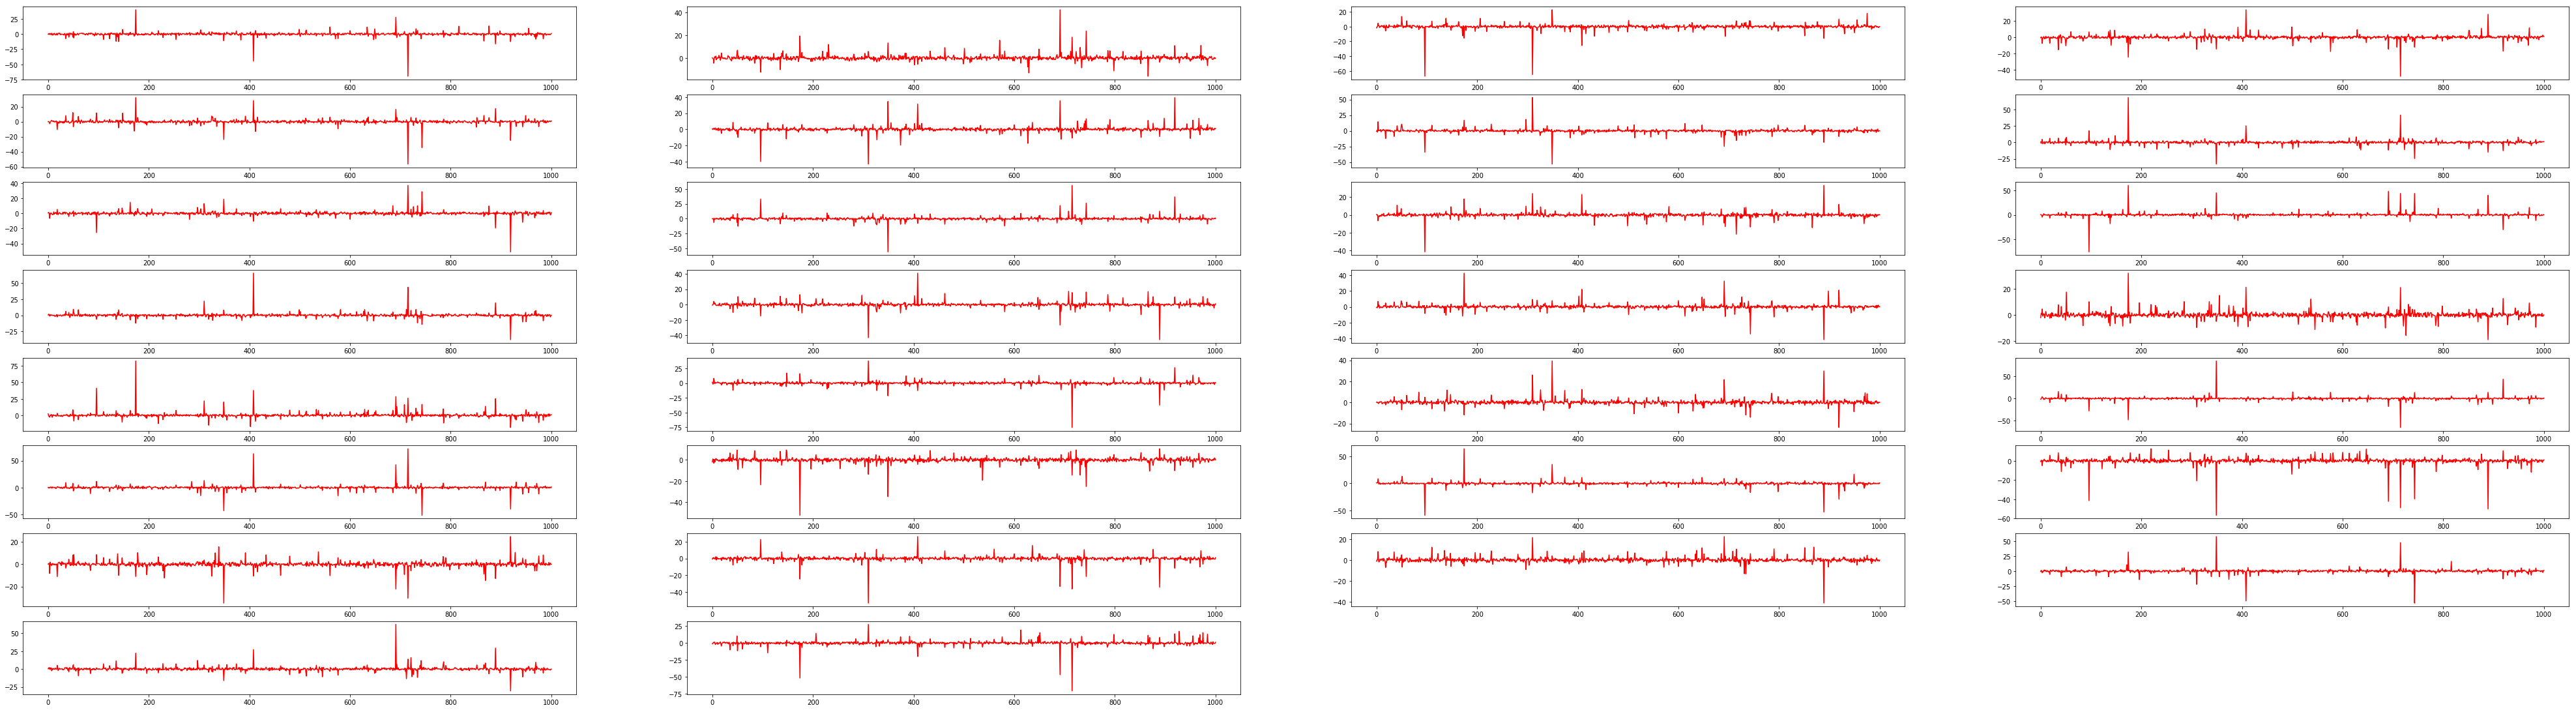

In [12]:
fig = plt.figure(figsize=(70, 64)) # width, height in inches
for i in range(30):
    sub = fig.add_subplot(26, 4, i + 1)
    sub.plot([i for i in range(0,data_raw.shape[1])] , np.array(data_raw.iloc[i,:]), color='red')

In [48]:
# plt.plot([i for i in range(0,1000)] , np.array(data_raw.iloc[1,0:-1]), color='red')

## Filering of data V1

In [8]:
data_raw.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-7.375136,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1


In [7]:

def cleanline(line,lvl):
    j1=np.array(line)
    j=np.array(j1)>j1.mean()+lvl*j1.std()
    j6=np.array(j1)<j1.mean()-lvl*j1.std()
    j[j6]=1
    neg=np.insert(j, j.shape[0], [0,0])
    neg=neg[1:j.shape[0]+1]
    pos=np.insert(j, 0, 0)
    pos=pos[0:j.shape[0]]
    final=np.array([j1[neg],j1[pos]])
    final=final.reshape(final.shape[1],2)
    a=final.mean(axis=1)
    j1[j]=a
    return j1

In [8]:
a=[]
for i in range(0,9999):
    a.append(cleanline(data_raw.iloc[i,0:-1],2))
data_clean=pd.DataFrame(data=a,columns=data_raw.columns[0:-1])
data_clean['label']=data_raw['label']
data_clean.head()


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_991,feature_992,feature_993,feature_994,feature_995,feature_996,feature_997,feature_998,feature_999,label
0,-0.272674,0.801643,-0.650531,0.952486,-0.153037,0.427145,-1.085534,1.318513,0.002588,-1.849832,...,-0.572848,-0.448690,0.073369,-0.845503,-1.074903,0.222103,-1.024658,-0.711647,0.036411,1
1,0.201004,-0.263537,-0.793137,-4.483672,0.745123,1.156577,0.351558,1.735511,-1.490988,-0.327063,...,1.045496,1.494638,-0.776573,-1.219524,-0.756398,-0.963046,0.488610,0.313609,-0.490794,0
2,-1.834495,-0.305209,0.053789,4.448289,1.294481,1.241900,-1.358354,-0.211469,-0.186544,0.964812,...,0.917945,0.920003,0.690022,-0.834381,-0.261806,-0.061880,-1.177730,-1.345305,-0.085971,0
3,-0.484526,0.473056,-0.345463,-0.201575,-0.817676,-0.778446,0.909734,-0.677147,-1.913900,-0.087426,...,0.598949,0.078195,0.024128,1.308711,0.943230,0.903181,0.501013,2.639802,1.540640,1
4,-0.032351,0.247055,-0.351119,-2.669246,-1.068889,0.322954,1.101136,1.817973,0.944537,0.406005,...,-0.851188,1.272217,0.172442,-0.509007,0.357073,0.523263,0.965078,0.297335,0.088714,1


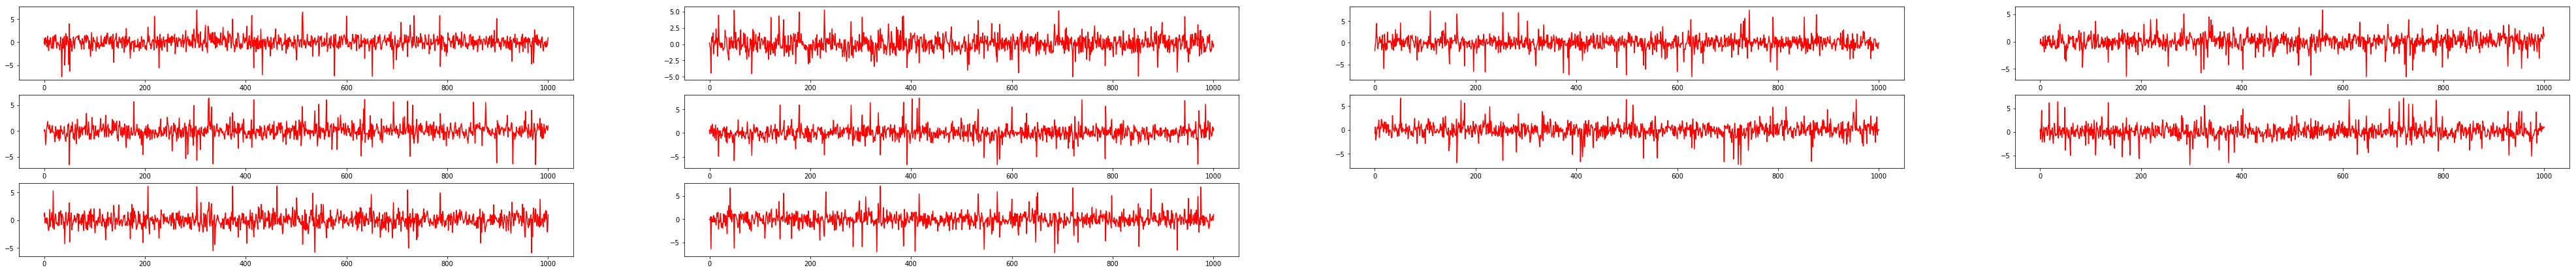

In [16]:
fig = plt.figure(figsize=(70, 64)) # width, height in inches
for i in range(10):
    sub = fig.add_subplot(26, 4, i + 1)
    sub.plot([i for i in range(0,data_clean.shape[1])] , np.array(data_clean.iloc[i,:]), color='red')


## If the raw data is the sound curve, we have outliers(again, we do not know the task in general... maybe clear outliers is a bad idea),so
    1)try to implement models without cleaning
    2)try to clean up raw data and compare results 
    

In [11]:
#split data to X and Y
y=np.array(data_raw.iloc[:-300,-1])
X=np.array(data_raw.iloc[:-300,:-1])
#-----------------------------------
y_final_test=np.array(data_raw.iloc[-300:,-1])
X_final_test=np.array(data_raw.iloc[-300:,:-1])
#-----------------------------------
y_clean=np.array(data_clean.iloc[:,-1])
X_clean=np.array(data_clean.iloc[:,:-1])
print(X.shape,y.shape)
print(X_final_test.shape,y_final_test.shape)
print(X_clean.shape,y_clean.shape)

(9699, 1000) (9699,)
(300, 1000) (300,)
(9999, 1000) (9999,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_c_train, X_c_test, y_c_train, y_c_test = train_test_split(X_clean, y_clean, test_size=0.33, random_state=42)

In [87]:
def auc(model,X_test,y_test):
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, pred, pos_label=1)
    return metrics.auc(fpr, tpr)

## Log-reg

In [14]:
from sklearn.linear_model import LogisticRegressionCV
model1 = LogisticRegressionCV(cv=10, random_state=0,
                           multi_class='multinomial',penalty='l2').fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

In [109]:
print ('AUC train:'+str(auc(model1,X_train,y_train)))
print ('AUC test:'+str(auc(model1,X_test,y_test)))
print ('AUC final test:'+str(auc(model1,X_final_test,y_final_test)))
print ('AUC mean:'+str(np.mean([auc(model1,X_test,y_test),auc(model1,X_final_test,y_final_test)])))


AUC train:0.9287303191436438
AUC test:0.9147532189260121
AUC final test:0.912026329834549
AUC mean:0.9133897743802806


In [18]:
# cleaned data results
model1_clean = LogisticRegressionCV(cv=10, random_state=0,
                           multi_class='multinomial',penalty='l2').fit(X_c_train, y_c_train)

In [20]:
print ('AUC train:'+str(auc(model1_clean,X_c_train,y_c_train)))
print ('AUC test:'+str(auc(model1_clean,X_c_test,y_c_test)))
print ('AUC final test:'+str(auc(model1_clean,X_final_test,y_final_test)))

AUC train:0.8028221615714686
AUC test:0.767800077895741
AUC final test:0.8635029354207436


## Ensemble

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf = RandomForestClassifier(n_estimators=500, max_depth=120,random_state=0).fit(X_train, y_train)

In [113]:
print ('AUC train:'+str(auc(rf,X_train,y_train)))
print ('AUC test:'+str(auc(rf,X_test,y_test)))
print ('AUC final test:'+str(auc(rf,X_final_test,y_final_test)))
print ('AUC mean:'+str(np.mean([auc(rf,X_test,y_test),auc(rf,X_final_test,y_final_test)])))

AUC train:1.0
AUC test:0.9220267930837112
AUC final test:0.9269925280199253
AUC mean:0.9245096605518182


## Randomforest Grid

In [88]:
Table=[]
trees=[i for i in range(10,300,10)]
deep=[i for i in range(50,200,50)]
model=[]
for i in trees:
    print (i)
    Line=[]
    for j in deep:
        print ('   --',j)
        rf = RandomForestClassifier(n_estimators=i, max_depth=j,random_state=0).fit(X_train, y_train)
        model.append([rf])
        Line.append([auc(rf,X_train,y_train),auc(rf,X_test,y_test)])
    Table.append(Line)
f=np.array(Table)
res_tr=pd.DataFrame(data=f[:,:,0]) 
res_test=pd.DataFrame(data=f[:,:,1])
res_tr.columns=deep;res_tr.index=trees
res_test.columns=deep;res_test.index=trees
report='Train:'+res_tr.round(3).astype(str)+' |  Test:'+res_test.round(3).astype(str)


10
   -- 50
   -- 100
   -- 150
20
   -- 50
   -- 100
   -- 150
30
   -- 50
   -- 100
   -- 150
40
   -- 50
   -- 100
   -- 150
50
   -- 50
   -- 100
   -- 150
60
   -- 50
   -- 100
   -- 150
70
   -- 50
   -- 100
   -- 150
80
   -- 50
   -- 100
   -- 150
90
   -- 50
   -- 100
   -- 150
100
   -- 50
   -- 100
   -- 150
110
   -- 50
   -- 100
   -- 150
120
   -- 50
   -- 100
   -- 150
130
   -- 50
   -- 100
   -- 150
140
   -- 50
   -- 100
   -- 150
150
   -- 50
   -- 100
   -- 150
160
   -- 50
   -- 100
   -- 150
170
   -- 50
   -- 100
   -- 150
180
   -- 50
   -- 100
   -- 150
190
   -- 50
   -- 100
   -- 150
200
   -- 50
   -- 100
   -- 150
210
   -- 50
   -- 100
   -- 150
220
   -- 50
   -- 100
   -- 150
230
   -- 50
   -- 100
   -- 150
240
   -- 50
   -- 100
   -- 150
250
   -- 50
   -- 100
   -- 150
260
   -- 50
   -- 100
   -- 150
270
   -- 50
   -- 100
   -- 150
280
   -- 50
   -- 100
   -- 150
290
   -- 50
   -- 100
   -- 150


In [90]:
report

,50,100,150
10,Train:1.0 | Test:0.65,Train:1.0 | Test:0.65,Train:1.0 | Test:0.65
20,Train:1.0 | Test:0.72,Train:1.0 | Test:0.72,Train:1.0 | Test:0.72
30,Train:1.0 | Test:0.761,Train:1.0 | Test:0.761,Train:1.0 | Test:0.761
40,Train:1.0 | Test:0.78,Train:1.0 | Test:0.78,Train:1.0 | Test:0.78
50,Train:1.0 | Test:0.798,Train:1.0 | Test:0.798,Train:1.0 | Test:0.798
60,Train:1.0 | Test:0.813,Train:1.0 | Test:0.813,Train:1.0 | Test:0.813
70,Train:1.0 | Test:0.831,Train:1.0 | Test:0.831,Train:1.0 | Test:0.831
80,Train:1.0 | Test:0.842,Train:1.0 | Test:0.842,Train:1.0 | Test:0.842
90,Train:1.0 | Test:0.849,Train:1.0 | Test:0.849,Train:1.0 | Test:0.849
100,Train:1.0 | Test:0.853,Train:1.0 | Test:0.853,Train:1.0 | Test:0.853


In [100]:
report.to_excel('random_forest_grid.xlsx') 

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# # parameters = {'n_estimators':[x for i in range(50,500,50)], 'max_depth':[x for i in range(20,500,5)]}
# parameters = {'n_estimators':[i for i in range(10,400,150) ], 'max_depth':[i for i in range(5,200,85) ]}
# rf = RandomForestClassifier(random_state=0)
# clf = GridSearchCV(rf, parameters,scoring='roc_auc', cv=5)
# clf.fit(X_train, y_train)
# clf.scoring
# clf.best_params_


In [837]:
print ('AUC train:'+str(auc(rf,X_train,y_train)))
print ('AUC test:'+str(auc(rf,X_test,y_test)))

AUC train:1.0
AUC test:0.6788280993990847


## FNN

In [129]:

from keras.layers import Input,Dense,Activation,Dropout,BatchNormalization
from keras.models import Model
from keras.utils import np_utils
from keras.optimizers import adam
from keras import regularizers
from sklearn.metrics import classification_report
import tensorflow as tf
from keras import backend as K

In [38]:
y1_train=np_utils.to_categorical(y_train,2)
y1_test=np_utils.to_categorical(y_test,2)

In [128]:
y1_train.shape

(6498, 2)

In [78]:
def auc1(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc


In [51]:
def res_fnn(model,X_final_test,X_test,y_test):
    auc1,auc2=0,0
    a=model.predict(X_final_test)
    final=[a[i,:].argmax() for i in range(0,a.shape[0])]
    fpr, tpr, thresholds = metrics.roc_curve(y_final_test, final, pos_label=1)
    auc1=metrics.auc(fpr, tpr)
    a=model.predict(X_test)
    final=[a[i,:].argmax() for i in range(0,a.shape[0])]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, final, pos_label=1)
    auc2=metrics.auc(fpr, tpr)
    return str(auc1.round(4))+' | '+str(auc2.round(4))+' | '+str(np.mean([auc1,auc2]).round(4))

In [79]:
def modelFNN(X_train,N,drop):    
    inputs = Input(shape=(X_train.shape[1],))
    midle=Dense(N, activation='relu',kernel_regularizer=regularizers.l2(0.0009))(inputs)
    drop=Dropout(drop)(midle)
   #midle1=Dense(2, activation='relu',kernel_regularizer=regularizers.l2(0.0008))(drop)
    output_layer = Dense(2, activation = 'softmax')(drop)
    model1 = Model(inputs=inputs, outputs=output_layer,)
    ADAM=adam(lr=0.0001)
    model1.compile(optimizer=ADAM,
              loss='categorical_crossentropy',
              metrics=[auc1])
    return model1

In [43]:
model=modelFNN(X_train,50,0.1)

In [80]:

model.fit(X_train,y1_train,batch_size=16,epochs=100,validation_data=(X_test,y1_test),verbose=1)

Train on 6498 samples, validate on 3201 samples
Epoch 1/100
6498/6498 [==============================] - 1s 179us/step - loss: 0.0212 - auc: 0.9907 - val_loss: 0.1337 - val_auc: 0.9907
Epoch 2/100
6498/6498 [==============================] - 1s 118us/step - loss: 0.0203 - auc: 0.9908 - val_loss: 0.1323 - val_auc: 0.9908
Epoch 3/100
6498/6498 [==============================] - 1s 116us/step - loss: 0.0203 - auc: 0.9908 - val_loss: 0.1308 - val_auc: 0.9909
Epoch 4/100
6498/6498 [==============================] - 1s 117us/step - loss: 0.0217 - auc: 0.9909 - val_loss: 0.1391 - val_auc: 0.9910
Epoch 5/100
6498/6498 [==============================] - 1s 100us/step - loss: 0.0212 - auc: 0.9910 - val_loss: 0.1314 - val_auc: 0.9910
Epoch 6/100
6498/6498 [==============================] - 1s 98us/step - loss: 0.0218 - auc: 0.9911 - val_loss: 0.1347 - val_auc: 0.9911
Epoch 7/100
6498/6498 [==============================] - 1s 98us/step - loss: 0.0223 - auc: 0.9912 - val_loss: 0.1337 - val_auc: 0.

In [81]:
print ('Test: '+'| Final test:'+'| Mean test')
res_fnn(model,X_final_test,X_test,y_test)

Test: | Final test:| Mean test


'0.9767 | 0.9816 | 0.9792'

## Grid experiment

In [82]:
res=[]
N=[i for i in range(10,200,30)]
drop=np.linspace(0.1,0.7,7)
for i in N:
    print (i)
    line=[]
    for j in drop:
        print ('   -- ',j)
        model=modelFNN(X_train,i,j)
        model.fit(X_train,y1_train,batch_size=16,nb_epoch=100,validation_data=(X_test,y1_test),verbose=0)
        line.append(res_fnn(model,X_final_test,X_test,y_test))
    res.append(line)
Report=pd.DataFrame(data=res)
Report.columns=drop;Report.index=N

10
   --  0.1


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
40
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
70
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
100
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
130
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
160
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7
190
   --  0.1
   --  0.2
   --  0.3
   --  0.4
   --  0.5
   --  0.6
   --  0.7


In [83]:
Report

,0.1,0.2,0.3,0.4,0.5,0.6,0.7
10,0.9041 | 0.9018 | 0.9029,0.864 | 0.8782 | 0.8711,0.8676 | 0.8725 | 0.8701,0.851 | 0.8769 | 0.864,0.8579 | 0.871 | 0.8645,0.8413 | 0.8425 | 0.8419,0.8346 | 0.8447 | 0.8397
40,0.9634 | 0.9631 | 0.9633,0.9704 | 0.9663 | 0.9684,0.9668 | 0.9535 | 0.9602,0.9538 | 0.946 | 0.9499,0.9504 | 0.9444 | 0.9474,0.9304 | 0.9287 | 0.9295,0.927 | 0.9193 | 0.9231
70,0.9836 | 0.9762 | 0.9799,0.9803 | 0.9782 | 0.9792,0.9737 | 0.974 | 0.9739,0.9767 | 0.9694 | 0.9731,0.9704 | 0.9679 | 0.9691,0.9735 | 0.9564 | 0.9649,0.9475 | 0.9491 | 0.9483
100,0.9701 | 0.9794 | 0.9747,0.9769 | 0.9753 | 0.9761,0.9802 | 0.9816 | 0.9809,0.9901 | 0.9776 | 0.9838,0.9834 | 0.9763 | 0.9799,0.9769 | 0.9712 | 0.9741,0.9802 | 0.967 | 0.9736
130,0.9738 | 0.9706 | 0.9722,0.9771 | 0.9772 | 0.9772,0.9901 | 0.9812 | 0.9857,0.98 | 0.9794 | 0.9797,0.9868 | 0.9788 | 0.9828,0.9803 | 0.9769 | 0.9786,0.9769 | 0.9707 | 0.9738
160,0.9836 | 0.9712 | 0.9774,0.9737 | 0.9781 | 0.9759,0.9802 | 0.9775 | 0.9788,0.9834 | 0.9835 | 0.9834,0.9834 | 0.9807 | 0.982,0.9836 | 0.9791 | 0.9813,0.9834 | 0.9754 | 0.9794
190,0.9771 | 0.974 | 0.9756,0.9868 | 0.9807 | 0.9837,0.9803 | 0.9778 | 0.9791,0.9901 | 0.981 | 0.9855,0.9802 | 0.9813 | 0.9807,0.9802 | 0.9813 | 0.9807,0.9868 | 0.98 | 0.9834


In [103]:
Report.to_csv('FNN_report.csv') 

## Consider models:
    1)Log-res
    2)Random forest
    3)FNN

The best model(based on auc only) is FNN with one layer with 190 units in hidden layer and dropout 0.4- Val-AUC-0.9855 .


In [126]:
c=[[0.91,0.92,0.9855]]
final=pd.DataFrame(data=c)
final.columns=['Log-reg','Random forest','FNN-1hidden']
final

,Log-reg,Random forest,FNN-1hidden
0,0.91,0.92,0.9855
